In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 119s 1us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

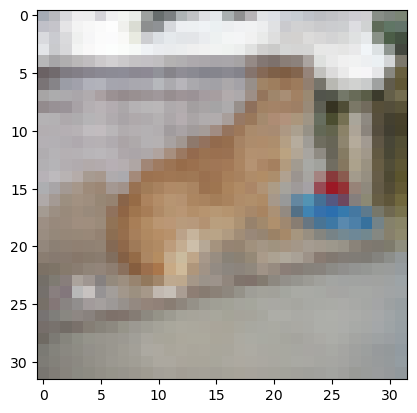

In [12]:
plt.imshow(x_train[1030])

In [13]:
x_train[0].max()

255

In [14]:
x_train = x_train/255

In [15]:
x_test = x_test/255

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_cat_train = to_categorical(y_train, 10)

In [19]:
y_cat_test = to_categorical(y_test, 10)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten

In [22]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)              

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [26]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4979 - accuracy: 0.4560 - val_loss: 1.3093 - val_accuracy: 0.5371
Epoch 2/15
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1721 - accuracy: 0.5858 - val_loss: 1.1244 - val_accuracy: 0.6054
Epoch 3/15
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0305 - accuracy: 0.6373 - val_loss: 1.0201 - val_accuracy: 0.6520
Epoch 4/15
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9310 - accuracy: 0.6759 - val_loss: 1.0059 - val_accuracy: 0.6509
Epoch 5/15
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8487 - accuracy: 0.7042 - val_loss: 1.0048 - val_accuracy: 0.6568
Epoch 6/15
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7730 - accuracy: 0.7319 - val_loss: 0.9806 - val_accuracy: 0.6714
Epoch 7/15
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7070 - accuracy: 0.7531 - val_loss: 0.9803 - 

In [27]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

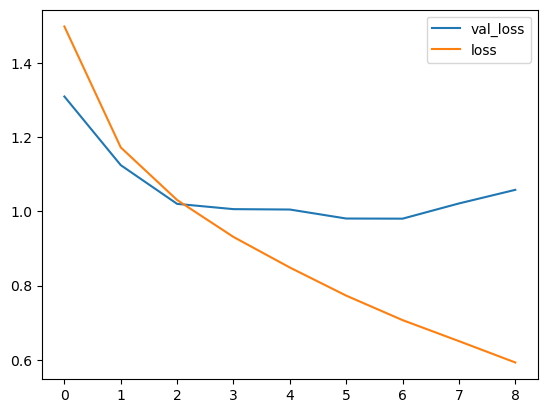

In [30]:
model_loss[['val_loss', 'loss']].plot()

<AxesSubplot:>

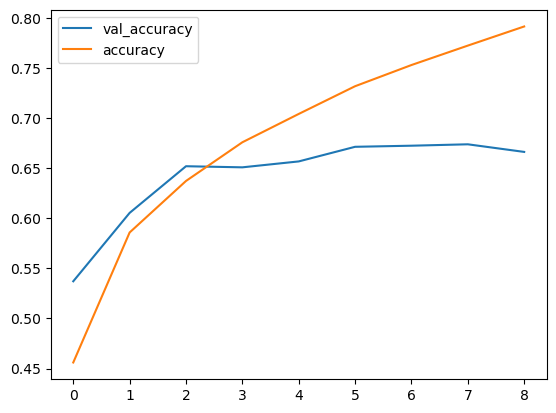

In [31]:
model_loss[['val_accuracy', 'accuracy']].plot()

In [32]:
model.evaluate(x_test, y_cat_test, verbose=0)

[1.0579068660736084, 0.6662999987602234]

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [37]:
prediction = np.argmax(predictions,axis=1)

In [38]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1000
           1       0.75      0.83      0.79      1000
           2       0.53      0.67      0.59      1000
           3       0.49      0.46      0.48      1000
           4       0.72      0.49      0.58      1000
           5       0.56      0.56      0.56      1000
           6       0.84      0.67      0.74      1000
           7       0.69      0.70      0.70      1000
           8       0.74      0.79      0.77      1000
           9       0.71      0.74      0.72      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.66     10000
weighted avg       0.67      0.67      0.66     10000



In [39]:
confusion_matrix(y_test, prediction)

array([[747,  31,  54,  19,   7,   8,   3,   5,  73,  53],
       [ 18, 833,   9,   7,   2,  12,   5,   5,  39,  70],
       [ 65,   7, 668,  53,  33,  60,  28,  42,  24,  20],
       [ 29,  13, 100, 462,  48, 196,  40,  52,  27,  33],
       [ 39,  15, 168,  79, 486,  49,  30,  94,  25,  15],
       [ 16,   9,  93, 166,  28, 565,  17,  70,  15,  21],
       [ 14,  26,  91,  75,  23,  45, 670,  27,  14,  15],
       [ 35,   5,  59,  38,  39,  69,   3, 703,   9,  40],
       [ 82,  49,  14,  16,   3,   7,   0,   3, 790,  36],
       [ 36, 120,  13,  19,   5,   5,   5,  13,  45, 739]], dtype=int64)

<AxesSubplot:>

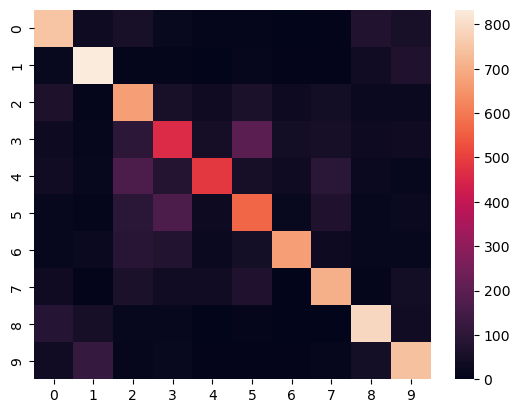

In [40]:
sns.heatmap(confusion_matrix(y_test, prediction))

In [46]:
my_image = x_test[34]

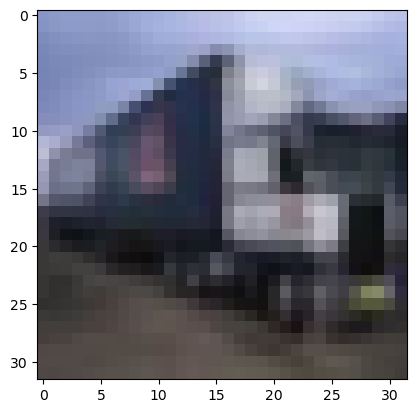

In [47]:
plt.imshow(my_image)

In [48]:
np.argmax(model.predict(my_image.reshape(1,32,32,3)) ,axis=1)

1/1 [==============================] - 0s 14ms/step


array([9], dtype=int64)